 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [53]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [54]:
# Reading whale returns
whale_returns_path = Path ("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col = "Date",parse_dates = True, infer_datetime_format=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [55]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col= "Date", parse_dates = True, infer_datetime_format=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count null
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns=algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col= "Date",parse_dates = True, infer_datetime_format=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [13]:
# Clean identified numeric fields with $ symbol
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
dayly_returns_sp500 = sp500_history.pct_change()
dayly_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
dayly_returns_sp500 =dayly_returns_sp500.dropna()
dayly_returns_sp500.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename Column
dayly_returns_sp500  = dayly_returns_sp500.rename(columns= {
    "Close":"S&P 500"
})

In [18]:
dayly_returns_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFrame
daylyret_all_rows = pd.concat(
    [whale_returns, algo_returns, dayly_returns_sp500], axis="columns", join="inner")
daylyret_all_rows
daylyret_all_rows.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

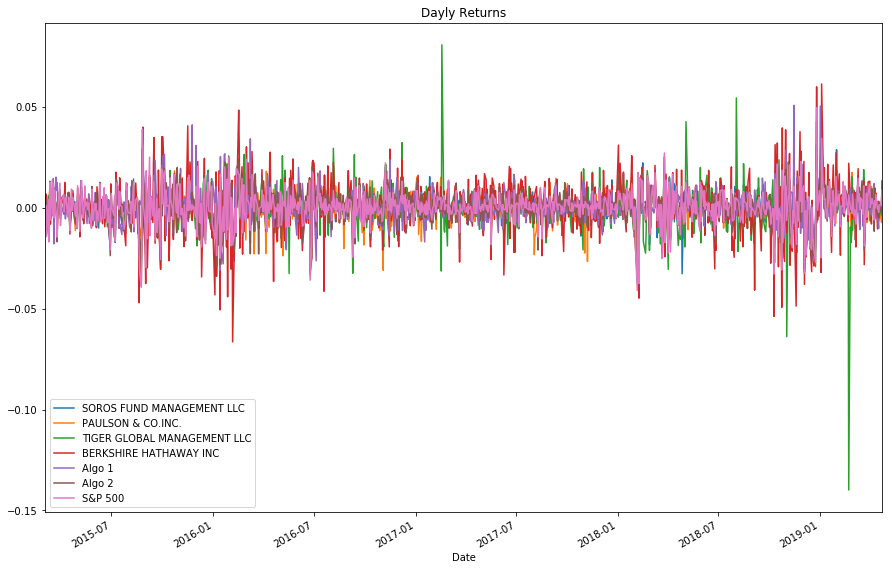

In [20]:
# Plot daily returns
daylyret_all_rows.plot( figsize=(15,10), title="Dayly Returns")

In [21]:
# Calculate cumulative returns
cumulative_returns = (1+ daylyret_all_rows).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


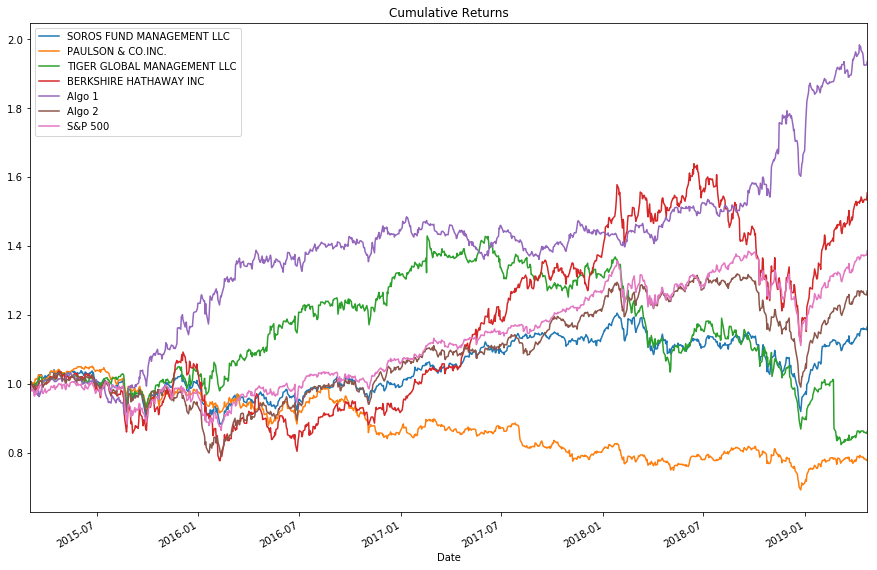

In [22]:
# Plot cumulative returns
cumulative_returns.plot( figsize=(15,10), title="Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

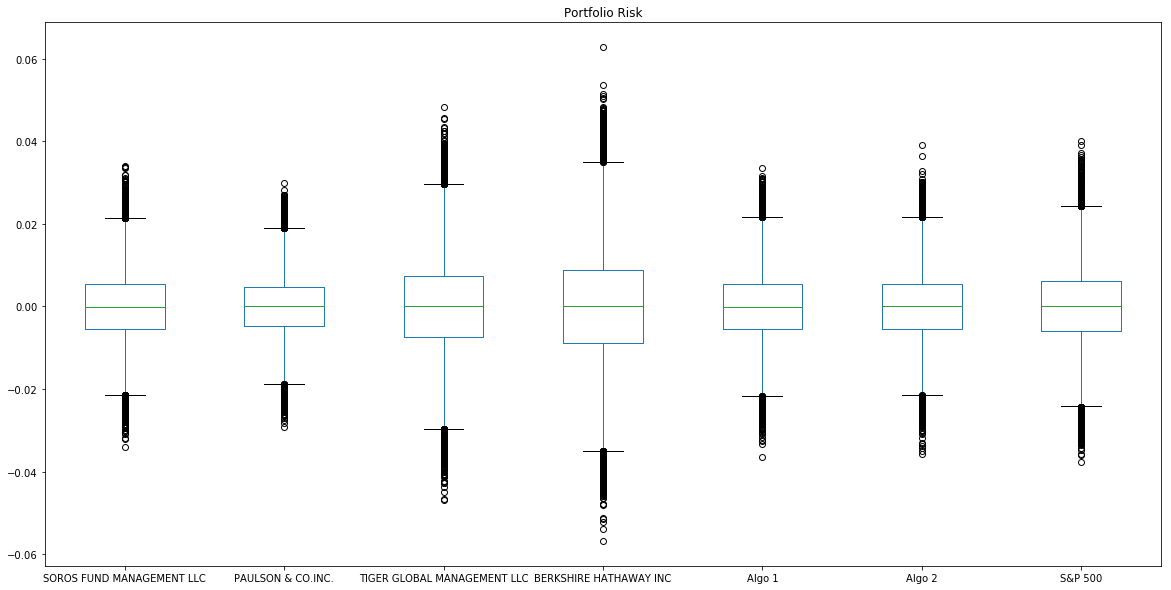

In [23]:
# Box plot to visually show risk

portfolio_a_std = np.random.normal(scale=0.008,size = 100000)
portfolio_b_std = np.random.normal(scale=0.007, size = 100000)
portfolio_c_std = np.random.normal(scale=0.011, size = 100000)
portfolio_d_std = np.random.normal(scale=0.013, size = 100000)
portfolio_e_std = np.random.normal(scale=0.008, size = 100000)
portfolio_f_std = np.random.normal(scale=0.008, size = 100000)
portfolio_g_std = np.random.normal(scale=0.009, size = 100000)


portfolio_std = pd.DataFrame({
    "SOROS FUND MANAGEMENT LLC" : portfolio_a_std, 
    "PAULSON & CO.INC." : portfolio_b_std, 
    "TIGER GLOBAL MANAGEMENT LLC" : portfolio_c_std,
    "BERKSHIRE HATHAWAY INC" : portfolio_d_std,
    "Algo 1" : portfolio_e_std,
    "Algo 2" : portfolio_f_std,   
    "S&P 500" : portfolio_g_std
    
})


portfolio_std.plot.box(figsize=(20,10),title="Portfolio Risk") 

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = daylyret_all_rows.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
#

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annu_stand_dev = daily_std * np.sqrt(252)
annu_stand_dev.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

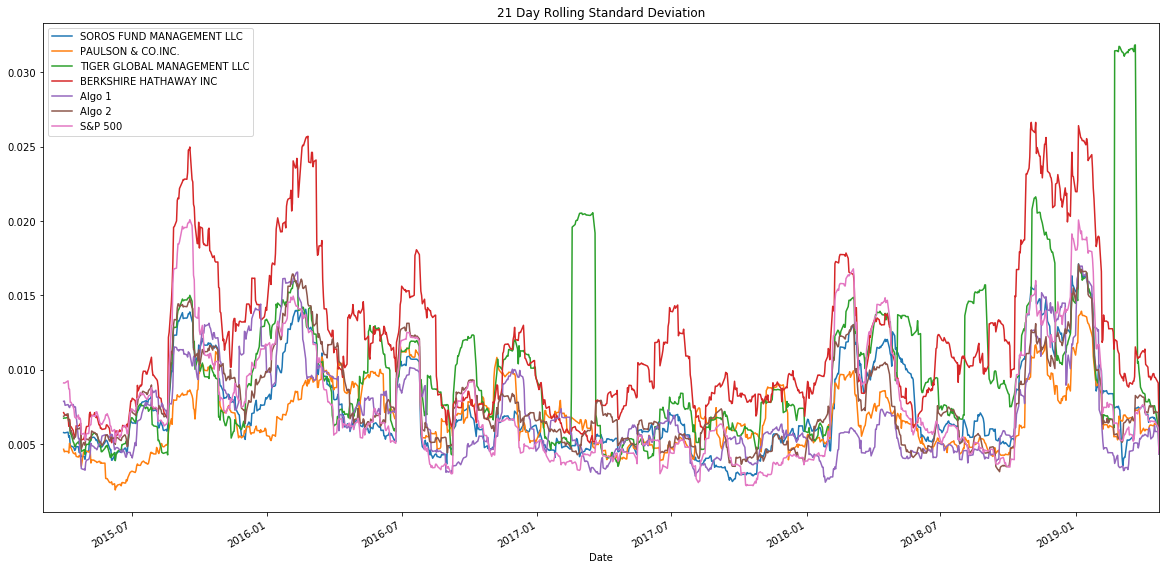

In [52]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rollingsd =daylyret_all_rows.rolling(window=21).std()
    
rollingsd.plot(figsize=(20,10),title="21 Day Rolling Standard Deviation") 



In [30]:
# Construct a correlation table
#correlation between return
correlation = daylyret_all_rows.corr()
correlation.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [31]:
# Calculate variance of all daily returns of AMD vs. S&P 500
variance = daylyret_all_rows['S&P 500'].var()
variance

7.316632424648712e-05

In [32]:
# Calculate beta of all daily returns of AMD
amd_beta = covariance / variance
amd_beta

NameError: name 'covariance' is not defined

In [33]:
#To calculate variance
#variance = daylyret_all_rows["S&P 500"].var()

In [34]:
#Covariance = dayly_return[].cov(dayly_return[])

#Beta= covariance/variance 

#combined_daily_returns = combined_df.pct_change()
#combined_daily_returns.head()

#covariance = combined_daily_returns['AMD'].cov(combined_daily_returns['SP500'])
#covariance
#variance = combined_daily_returns['SP500'].var()
#variance
#amd_beta = covariance / variance
#amd_beta

In [255]:
# Calculate a rolling window using the exponentially weighted moving average. 
# rolling_coveriance = dayly_return[].rolling(window 30).cov(dayly_return["SAP 500"])
#rolling_coveriance.plot(),title= ""

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [256]:
# Calculate annualized Sharpe Ratios
# share ratios calculation 
sharpe_ratios = (daylyret_all_rows.mean()*252)/ (daylyret_all_rows.std()*np.sqrt(252))
sharpe_ratios.head(7)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

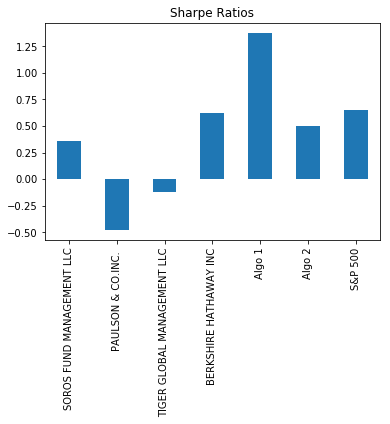

In [257]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= "bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [279]:
# Read the first stock
dji_historical_path = Path("Resources/dji_historical.csv")
dji_historical= pd.read_csv(dji_historical_path,index_col= "Trade DATE",parse_dates = True, infer_datetime_format=True)
dji_historical.sort_index
dji_historical.head()

,Symbol,Close,Open
Trade DATE,,,
2019-05-08,DJI,26014.0,25947.0
2019-05-07,DJI,25973.0,26220.0
2019-05-06,DJI,26405.0,26284.0
2019-05-05,DJI,NaN,NaN
2019-05-03,DJI,26499.0,26273.0


In [280]:
# Delete colums
dji_historical = dji_historical.drop(columns=["Open"])
dji_historical.head()

,Symbol,Close
Trade DATE,,
2019-05-08,DJI,26014.0
2019-05-07,DJI,25973.0
2019-05-06,DJI,26405.0
2019-05-05,DJI,NaN
2019-05-03,DJI,26499.0


In [281]:
# Rename columns
dji_historical = dji_historical.rename(columns={
    "Close":"NOCP"
})
dji_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-08,DJI,26014.0
2019-05-07,DJI,25973.0
2019-05-06,DJI,26405.0
2019-05-05,DJI,NaN
2019-05-03,DJI,26499.0


In [282]:
# Read the first stock
dax_historical_path = Path("Resources/dax_historical.csv")
dax_historical = pd.read_csv(dax_historical_path,index_col= "Trade DATE",parse_dates = True, infer_datetime_format=True)
dax_historical.sort_index()
dax_historical.head()


,Symbol,Open,Close,High,Volume,Low,Adj Close
Trade DATE,,,,,,,
2019-05-03,DAX,12345.32031,12412.75000,12435.66992,0.0,12344.23047,12412.75000
2019-05-02,DAX,12349.09961,12345.41992,12402.87012,0.0,12303.95996,12345.41992
2019-04-30,DAX,12313.96973,12344.08008,12345.30957,0.0,12281.71973,12344.08008
2019-04-29,DAX,12308.98047,12328.01953,12376.05957,0.0,12266.33984,12328.01953
2019-04-26,DAX,12284.45996,12315.17969,12323.63965,0.0,12259.75977,12315.17969


In [283]:
# Delete colums
dax_historical = dax_historical.drop(columns=["Open","High","Low","Adj Close","Volume"])
dax_historical.head()

,Symbol,Close
Trade DATE,,
2019-05-03,DAX,12412.75000
2019-05-02,DAX,12345.41992
2019-04-30,DAX,12344.08008
2019-04-29,DAX,12328.01953
2019-04-26,DAX,12315.17969


In [284]:
# Rename columns
dax_historical = dax_historical.rename(columns={
    "Close":"NOCP"
})
dax_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-03,DAX,12412.75000
2019-05-02,DAX,12345.41992
2019-04-30,DAX,12344.08008
2019-04-29,DAX,12328.01953
2019-04-26,DAX,12315.17969


In [285]:
# Read the first stock
goog_historical_path = Path("Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_path,index_col= "Trade DATE",parse_dates = True, infer_datetime_format=True)
goog_historical.sort_index()
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [286]:
# Read the second stock
aapl_historical_path = Path("Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_path,index_col= "Trade DATE",parse_dates = True, infer_datetime_format=True,)
aapl_historical.sort_index()
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [287]:
# Read the third stock
cost_historical_path = Path("Resources/cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_path,index_col= "Trade DATE",parse_dates = True, infer_datetime_format=True)
cost_historical.sort_index()
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [288]:
# Concatenate all stocks into a single DataFrame
df_rows = pd.concat(
    [dji_historical, dax_historical,goog_historical, aapl_historical, cost_historical], axis="rows", join="inner")
df_rows
df_rows.head()

,Symbol,NOCP
Trade DATE,,
2019-05-08,DJI,26014.0
2019-05-07,DJI,25973.0
2019-05-06,DJI,26405.0
2019-05-05,DJI,NaN
2019-05-03,DJI,26499.0


In [289]:
# Reset the index
df_rows = df_rows.reset_index()
df_rows.head()

,Trade DATE,Symbol,NOCP
0,2019-05-08,DJI,26014.0
1,2019-05-07,DJI,25973.0
2,2019-05-06,DJI,26405.0
3,2019-05-05,DJI,NaN
4,2019-05-03,DJI,26499.0


In [290]:
# Pivot so that each column of prices represents a unique symbol
df_rows=df_rows.pivot(index="Trade DATE", columns="Symbol")
df_rows.head()

NOCP                                       
Symbol        AAPL    COST          DAX      DJI     GOOG
Trade DATE                                               
2018-05-07     NaN     NaN  12948.13965  24301.0      NaN
2018-05-08     NaN     NaN  12912.20996  24307.0      NaN
2018-05-09     NaN     NaN  12943.05957  24502.0      NaN
2018-05-10     NaN     NaN  13022.87012  24692.0      NaN
2018-05-11  188.59  195.76  13001.24023  24823.0  1098.26

In [291]:
#Rename a column
df_rows  = df_rows.rename(columns={
    "NOCP GOOG":"GOOG"
})

In [292]:
#Count null
df_rows.isnull().sum()

      Symbol
NOCP  AAPL      63
      COST      63
      DAX       63
      DJI       63
      GOOG      63
dtype: int64

In [298]:
# Drop null
df_rows =df_rows.dropna()
df_rows.isnull().sum()

      Symbol
NOCP  AAPL      0
      COST      0
      DAX       0
      DJI       0
      GOOG      0
dtype: int64

In [299]:
df_rows_daylyreturn = df_rows.pct_change()
df_rows_daylyreturn.head()

NOCP                                         
Symbol          AAPL      COST       DAX       DJI       GOOG
Trade DATE                                                   
2018-05-14       NaN       NaN       NaN       NaN        NaN
2018-05-15  2.895452 -4.331291 -0.673449 -4.578220 -11.790218
2018-05-16 -2.026877 -9.091523 -4.429708 -1.357226  -1.123479
2018-05-17 -1.677584 -0.728937  3.489951 -1.448545  -2.249029
2018-05-18 -0.424935 -1.715895 -1.309079 -1.472910   2.857251

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [297]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3,1/3,1/3]
portfolio_returns = df_rows_daylyreturn.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14         NaN
2018-05-15   -6.159242
2018-05-16   -6.009605
2018-05-17   -0.871381
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
return_combined = pd.concat(
    [portfolio_retruns, daylyret_all_rows], axis="columns", join="inner")
return_combined
return_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
return_combined =return_combined.dropna()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
daily_stdd = return_combined.std()
daily_stdd.head(7)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

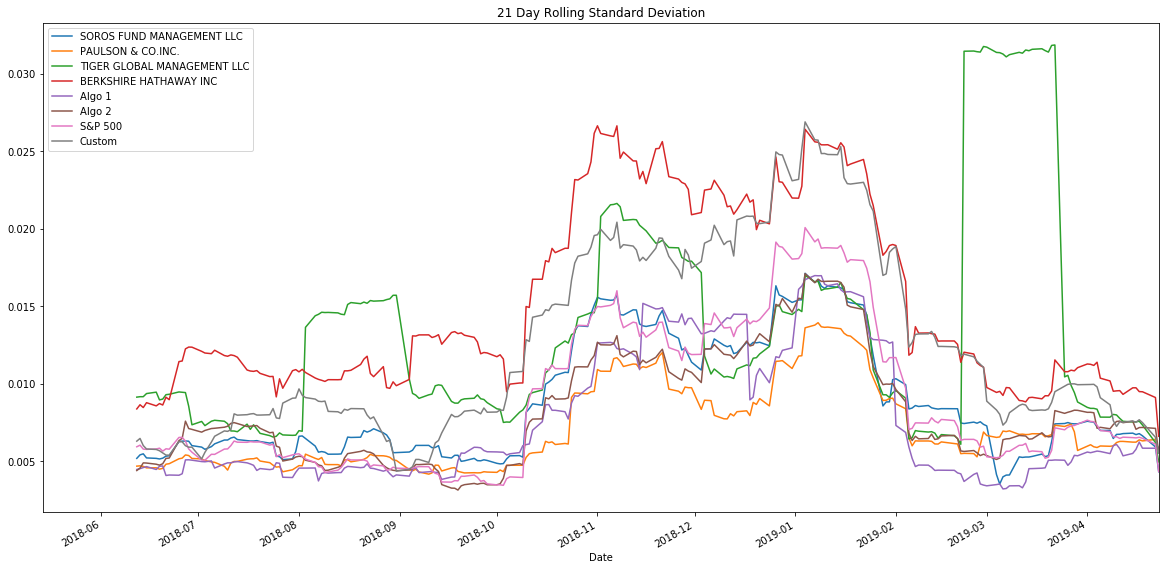

In [39]:
# Rolling
return_combined.rolling(window=21).std(.plot(figsize=(20,10),title="21 Day Rolling Standard Deviation") )

In [40]:
# Annualized Sharpe Ratios
sharpe_ratios_a = (return_combined.mean()*252)/ (return_combined.std()*np.sqrt(252))
sharpe_ratios_a.head(7)

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

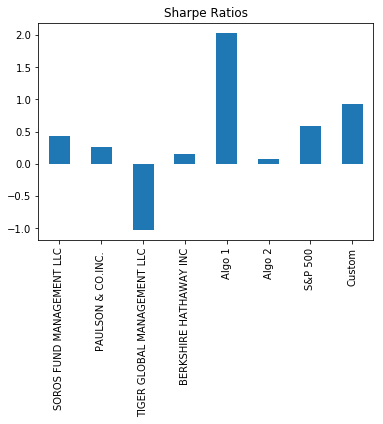

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_a.plot(kind= "bar", title = "Sharpe Ratios")

In [42]:
# Create a correlation analysis
correlation = return_combined.corr()
correlation.head(8)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


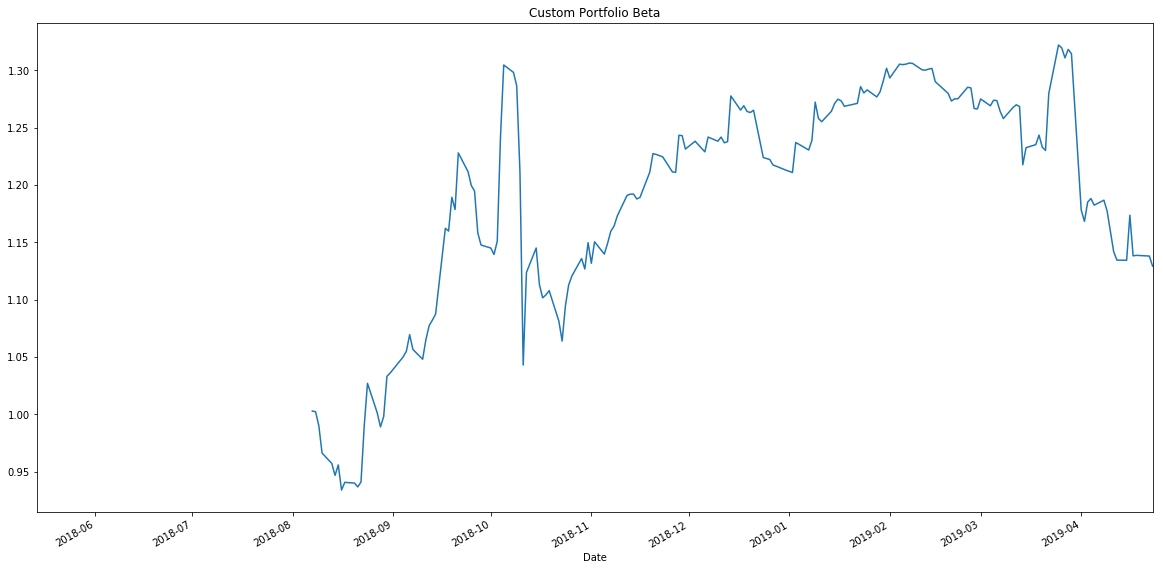

In [43]:
# Beta
# YOUR CODE HERE